In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
#copied to googledrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading dataset from drive
df=pd.read_csv("/content/drive/MyDrive/loan.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#taking top 5 columns to check the data
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
#getting details of the data like total no.of rows and columns
df.shape

(39717, 111)

In [ ]:
#getting details of the data like total no.of rows and columns. works almost similarly as shape.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [ ]:
#extracting mean median mode etc type data for columns we have. 
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,90.000000,9.000000,0.0000

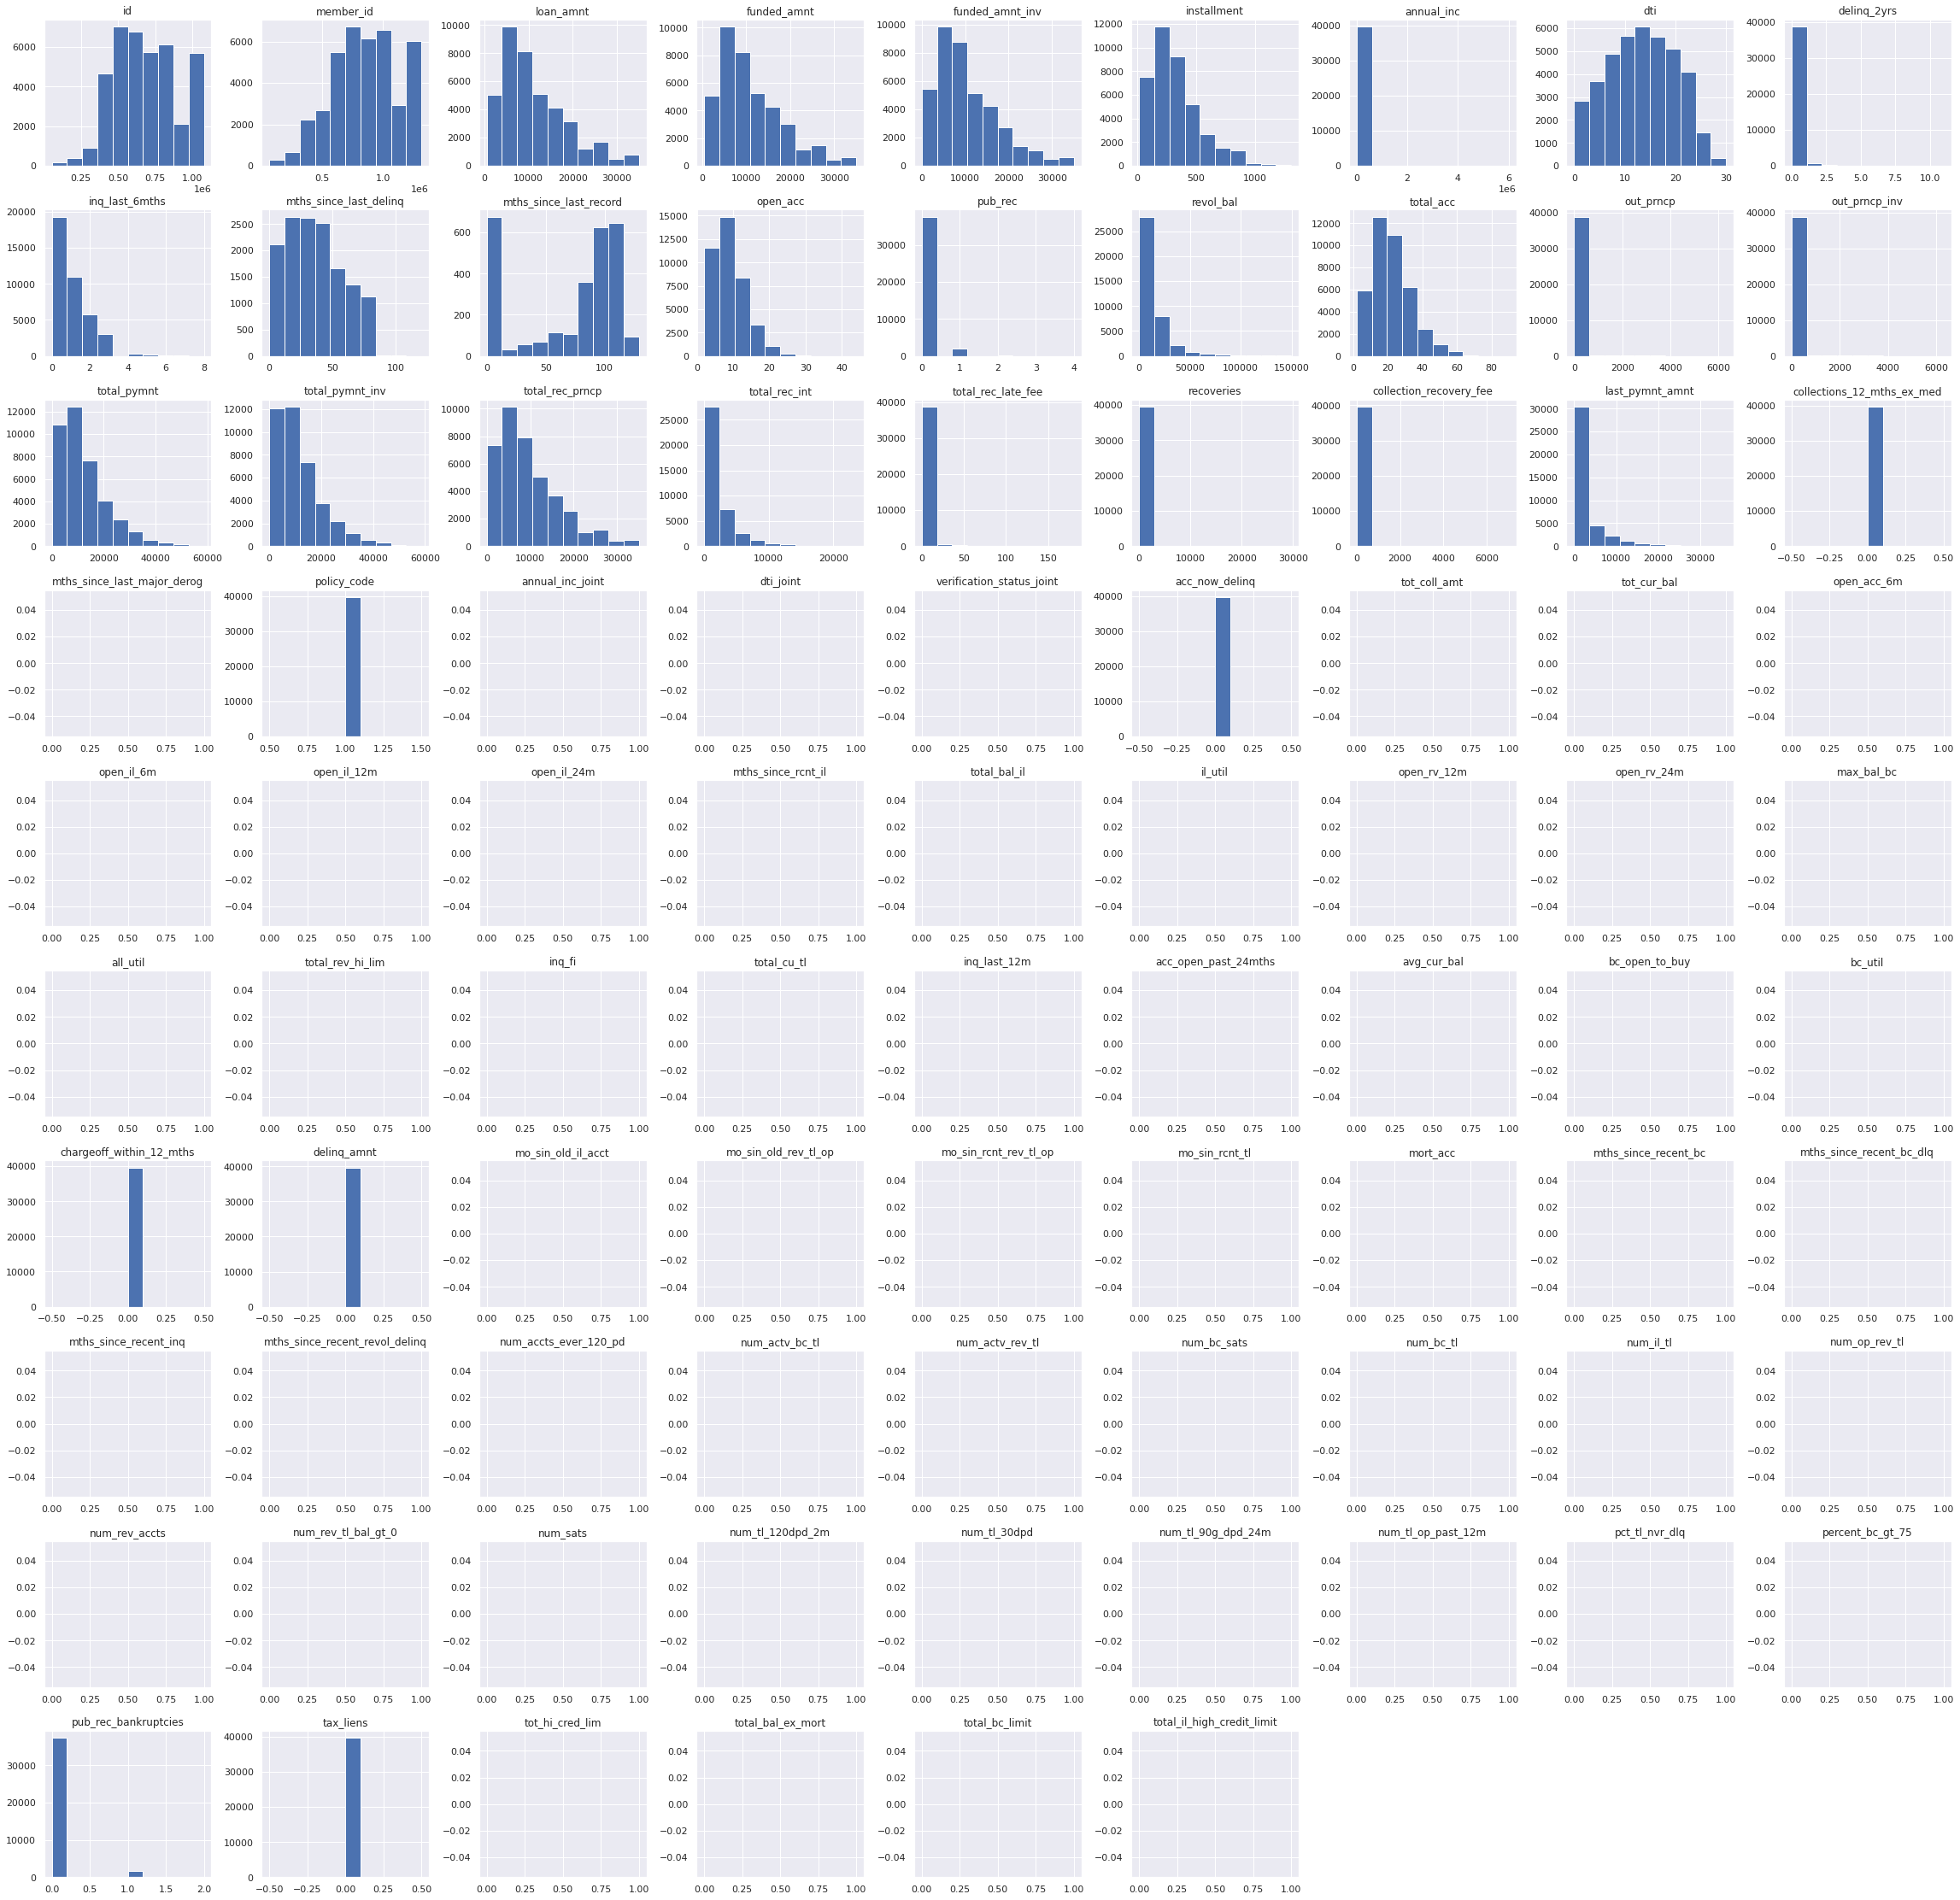

In [ ]:
#histogram of all the numerical figures of the data
df.hist(figsize = (40, 40))
plt.show()

In [ ]:
#checking for null values in the data
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [ ]:
#here we have taken top 60 columns with more percentage of null values sorted in descending order.
(df.isna().sum()/len(df)*100).sort_values(ascending=False)[:60]

total_il_high_credit_limit        100.000000
mo_sin_old_rev_tl_op              100.000000
bc_util                           100.000000
bc_open_to_buy                    100.000000
avg_cur_bal                       100.000000
acc_open_past_24mths              100.000000
inq_last_12m                      100.000000
total_cu_tl                       100.000000
inq_fi                            100.000000
total_rev_hi_lim                  100.000000
all_util                          100.000000
max_bal_bc                        100.000000
open_rv_24m                       100.000000
open_rv_12m                       100.000000
il_util                           100.000000
total_bal_il                      100.000000
mths_since_rcnt_il                100.000000
open_il_24m                       100.000000
open_il_12m                       100.000000
open_il_6m                        100.000000
open_acc_6m                       100.000000
tot_cur_bal                       100.000000
tot_coll_a

In [ ]:
#Here we are removing the columns with more than 80% null values.
col_list=(df.isna().sum()/len(df)*100).sort_values(ascending=False)
col_list_1=col_list[col_list>80].index
col_list_1

Index(['total_il_high_credit_limit', 'mo_sin_old_rev_tl_op', 'bc_util',
       'bc_open_to_buy', 'avg_cur_bal', 'acc_open_past_24mths', 'inq_last_12m',
       'total_cu_tl', 'inq_fi', 'total_rev_hi_lim', 'all_util', 'max_bal_bc',
       'open_rv_24m', 'open_rv_12m', 'il_util', 'total_bal_il',
       'mths_since_rcnt_il', 'open_il_24m', 'open_il_12m', 'open_il_6m',
       'open_acc_6m', 'tot_cur_bal', 'tot_coll_amt', 'total_bc_limit',
       'dti_joint', 'annual_inc_joint', 'mths_since_last_major_derog',
       'mo_sin_old_il_acct', 'verification_status_joint',
       'mo_sin_rcnt_rev_tl_op', 'num_il_tl', 'mo_sin_rcnt_tl',
       'total_bal_ex_mort', 'tot_hi_cred_lim', 'percent_bc_gt_75',
       'pct_tl_nvr_dlq', 'num_tl_90g_dpd_24m', 'num_tl_30dpd',
       'num_tl_120dpd_2m', 'num_sats', 'num_rev_tl_bal_gt_0', 'num_rev_accts',
       'num_op_rev_tl', 'num_tl_op_past_12m', 'num_bc_tl', 'mort_acc',
       'num_actv_rev_tl', 'num_actv_bc_tl', 'num_accts_ever_120_pd',
       'mths_since_re

In [ ]:
#dropping the columns here with more than 80% null values
df_2=df.drop(df[col_list_1],axis=1)

In [ ]:
#checking the shape of data after removing those extra fields
df_2.shape

(39717, 55)

In [ ]:
#checking the datatypes of the fields available
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [ ]:
#dropping unnecessary columns from the dataset.
del_col_lst=['desc','url','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq',
             'chargeoff_within_12_mths','delinq_amnt','tax_liens','initial_list_status','pymnt_plan','emp_title']

In [ ]:
df_3=df_2.drop(df[del_col_lst],axis=1)

In [ ]:
#checking shape again after dropping the dataset
df_3.shape

(39717, 43)

In [ ]:
#took the columns with null values 
df_3.isna().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    50
total_acc                      0
out_prncp 

In [ ]:
#df.fillna(columns=['mths_since_last_delniq','revol_util','pub_rec_bankruptcies'])

In [ ]:
#replaced the null values with median 
df_3['mths_since_last_delinq'].fillna(df_3['mths_since_last_delinq'].median(),inplace=True)
df_3['pub_rec_bankruptcies'].fillna(df_3['pub_rec_bankruptcies'].median(),inplace=True)

In [ ]:
df_3.isna().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
title                        11
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prncp                     0
out_prnc

In [ ]:
#replaced the null values in below column with mode
df_3['title'].fillna(df_3['title'].mode(),inplace=True)

In [ ]:
#for emp legth, replaced it with more readable format 
emp_length= {'< 1 year' : 0,'1 year' : 1,'2 years' : 2,'3 years' : 3,'4 years' : 4,'5 years' : 5,
             '6 years' : 6,'7 years' : 7,'8 years' : 8,'9 years' : 9,'10+ years' : 10}
df_3= df_3.replace({"emp_length": emp_length})

In [ ]:
df_3['emp_length'].value_counts()

10.0    8879
0.0     4583
2.0     4388
3.0     4095
4.0     3436
5.0     3282
1.0     3240
6.0     2229
7.0     1773
8.0     1479
9.0     1258
Name: emp_length, dtype: int64

In [ ]:
#filled the numm values with median
df_3['emp_length'].fillna(df_3['emp_length'].median(),inplace=True)

In [ ]:
df_3.isna().sum()

id                          0
member_id                   0
loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                      11
zip_code                    0
addr_state                  0
dti                         0
delinq_2yrs                 0
earliest_cr_line            0
inq_last_6mths              0
mths_since_last_delinq      0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                 50
total_acc                   0
out_prncp                   0
out_prncp_inv               0
total_pymnt                 0
total_pymn

In [ ]:
#removing % symbol from the below columns to get much cleaner data
df_3["term"]= df_3["term"].str.replace("months", "")
df_3["int_rate"]= df_3["int_rate"].str.replace("%", "")
df_3["revol_util"]= df_3["revol_util"].str.replace("%", "")

In [ ]:
df_3['revol_util'].fillna(df_3['revol_util'].median(),inplace=True)
df_3['title'].fillna(df_3['title'].mode(),inplace=True)

In [ ]:
df_3 = df_3.dropna(axis = 0, how ='any') 

In [ ]:
df_3.isna().sum()

###Dropping the duplicate records

In [ ]:
df_3.shape

(39717, 43)

In [ ]:
df_3.drop_duplicates(inplace=True)

In [ ]:
df_3.shape

(39717, 43)

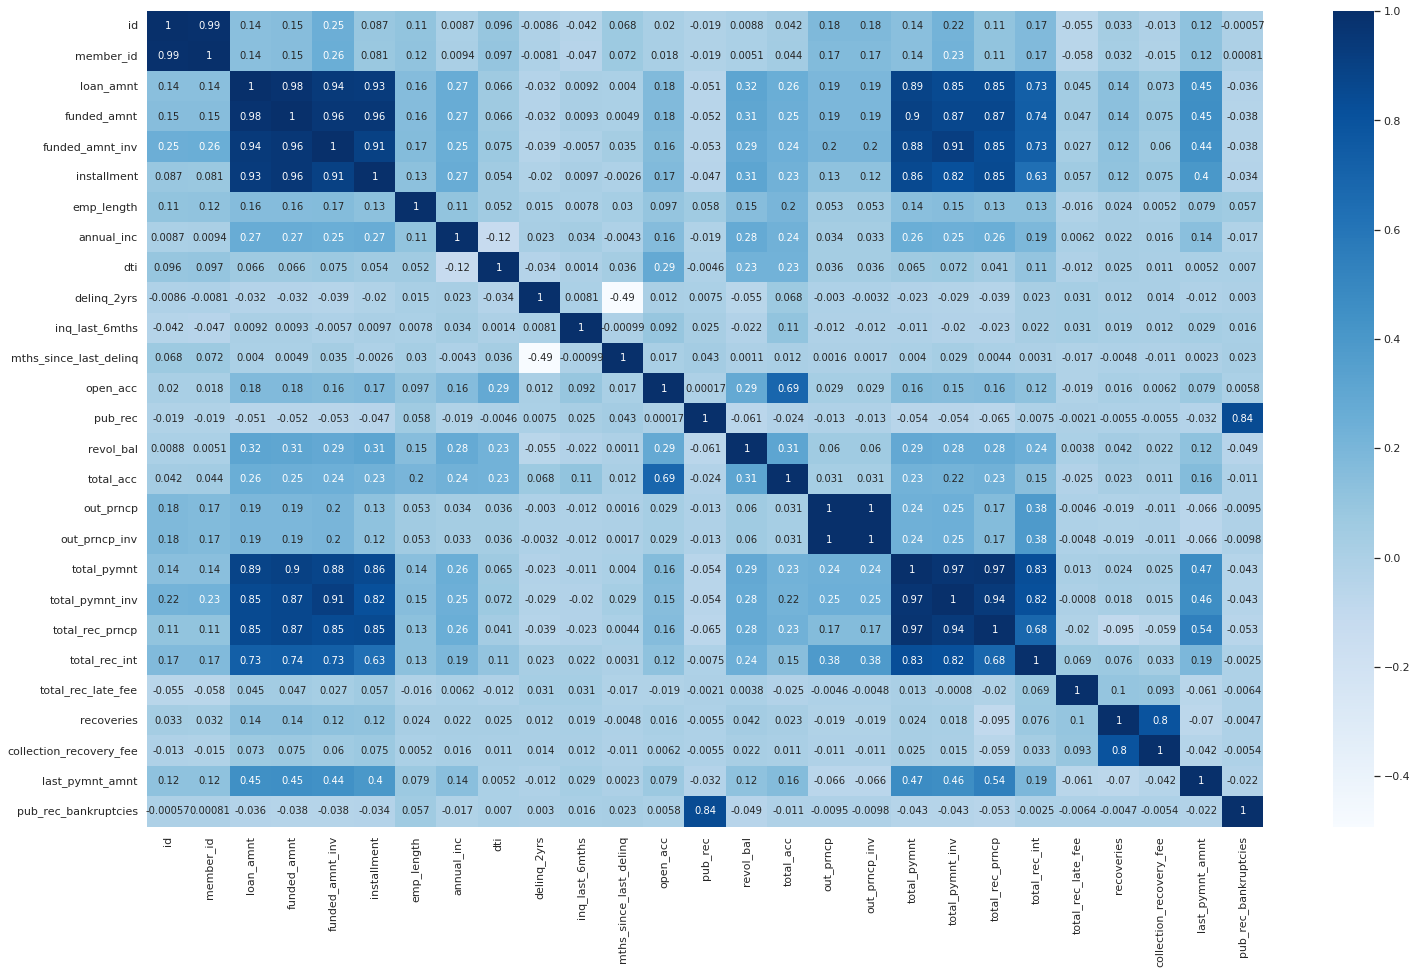

In [ ]:
#after cleaning the data, heat map is plotted to check the correlation of columns
plt.figure(figsize=(25,15))
cor=df_3.corr()
sns.heatmap(cor,annot=True,cmap="Blues")
plt.show()

In [ ]:
#checking the datatypes of the data available. 
df_3.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_length                 float64
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
mths_since_last_delinq     float64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util          

In [ ]:
#collated the numerical variables into one list
cols = df_3.select_dtypes([np.number]).columns

In [ ]:
cols

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'pub_rec_bankruptcies'],
      dtype='object')

In [ ]:
#collated categorical variables into other list
cat_col=df_3.select_dtypes(include=['object']).columns.tolist()

In [ ]:
cat_col

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'revol_util',
 'last_pymnt_d',
 'last_credit_pull_d']

In [ ]:
data_num=df_3[['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'pub_rec_bankruptcies']]

Below bar graph showing the data with loan status on different tenures. 
Here we can see that loan status is fully paid when the tenure of the loan is 36 months approximately. Charged off members are comparitively similar in both 36 months and 60 months. 

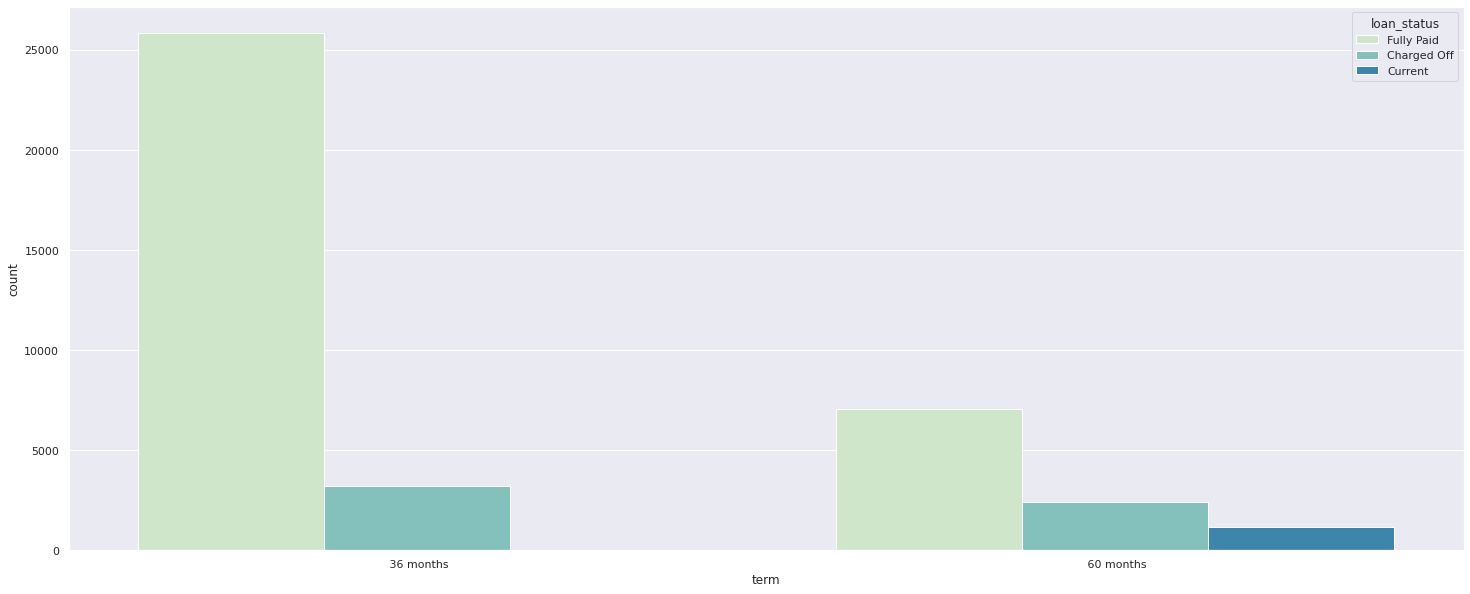

In [ ]:
plt.figure(figsize=(25,10))
chart=sns.countplot(data=df_3,
                      x='term',
                      hue='loan_status',
                      palette='GnBu')

Below bar graph showing the loan status with respect to grade of the loan. A,B and C grade loans are tend to be paid fully compared to other grades. Grade F seems to be least likely fully paid loans here.Charged off loans are almost simliar in A,B,C & D but very less than fully paid. 

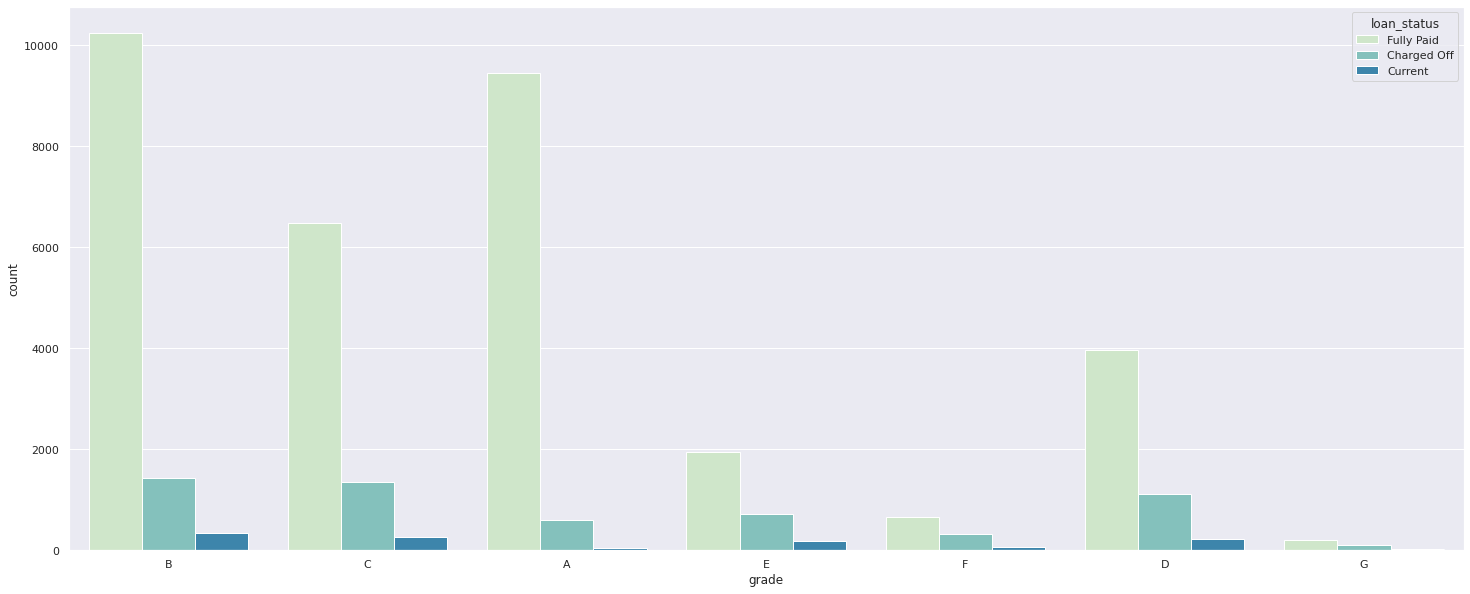

In [ ]:
plt.figure(figsize=(25,10))
chart=sns.countplot(data=df_3,
                      x='grade',
                      hue='loan_status',
                      palette='GnBu')

Below plot gives the details of the loan payment based on subgrades.
A4,B5,B3,B4,A5  grades are looking good with full loan repayments. E2 to G5 in the end looks like it has least number of charged off cases. More charged off cases are observed in subgrades of B and C.

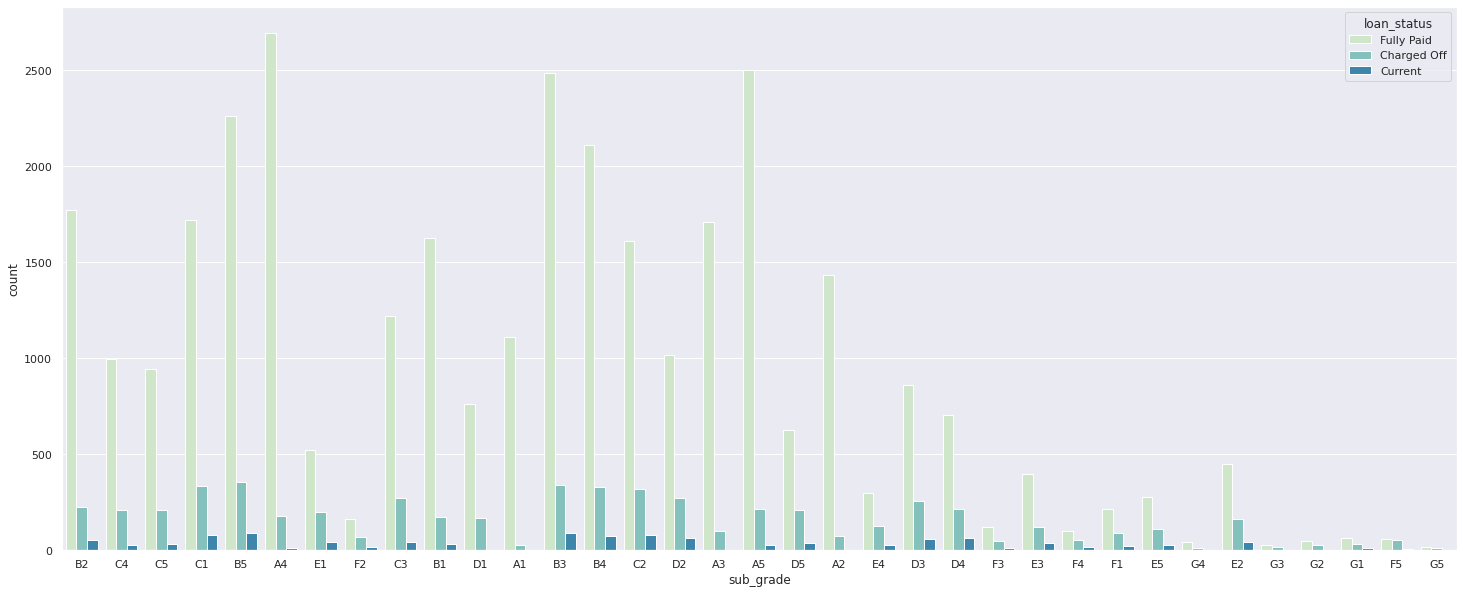

In [ ]:
plt.figure(figsize=(25,10))
chart=sns.countplot(data=df_3,
                      x='sub_grade',
                      hue='loan_status',
                      palette='GnBu')

Below is the graph that shows the loan status based on type of home onwership. 
People with own houses are less likely to be defaulted. People with rented  house or mortgaged houses are most likely to pay their loans fully.

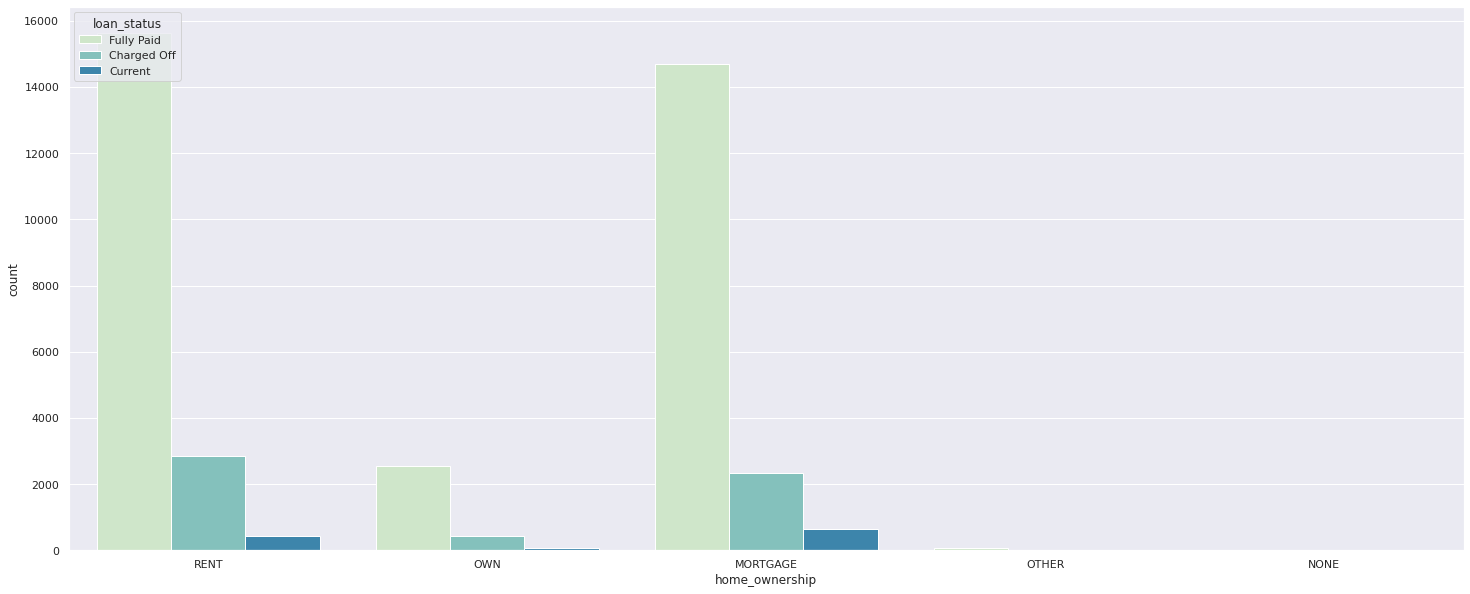

In [ ]:
plt.figure(figsize=(25,10))
chart=sns.countplot(data=df_3,
                      x='home_ownership',
                      hue='loan_status',
                      palette='GnBu')

Below graph shows that both verified and not verified sources of members taking loans are quite similar. 

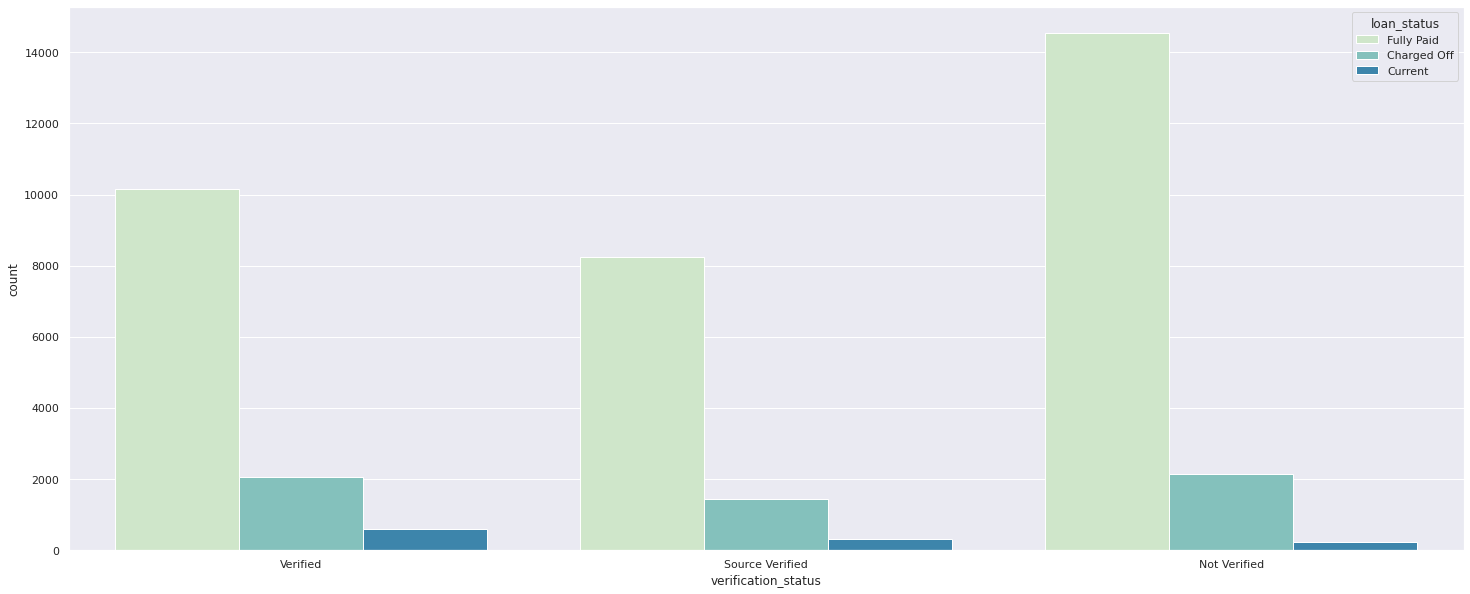

In [ ]:
plt.figure(figsize=(25,10))
chart=sns.countplot(data=df_3,
                      x='verification_status',
                      hue='loan_status',
                      palette='GnBu')

Below graph shows only 10% of the population is getting deafulted. Rest have pais their loans fully. 

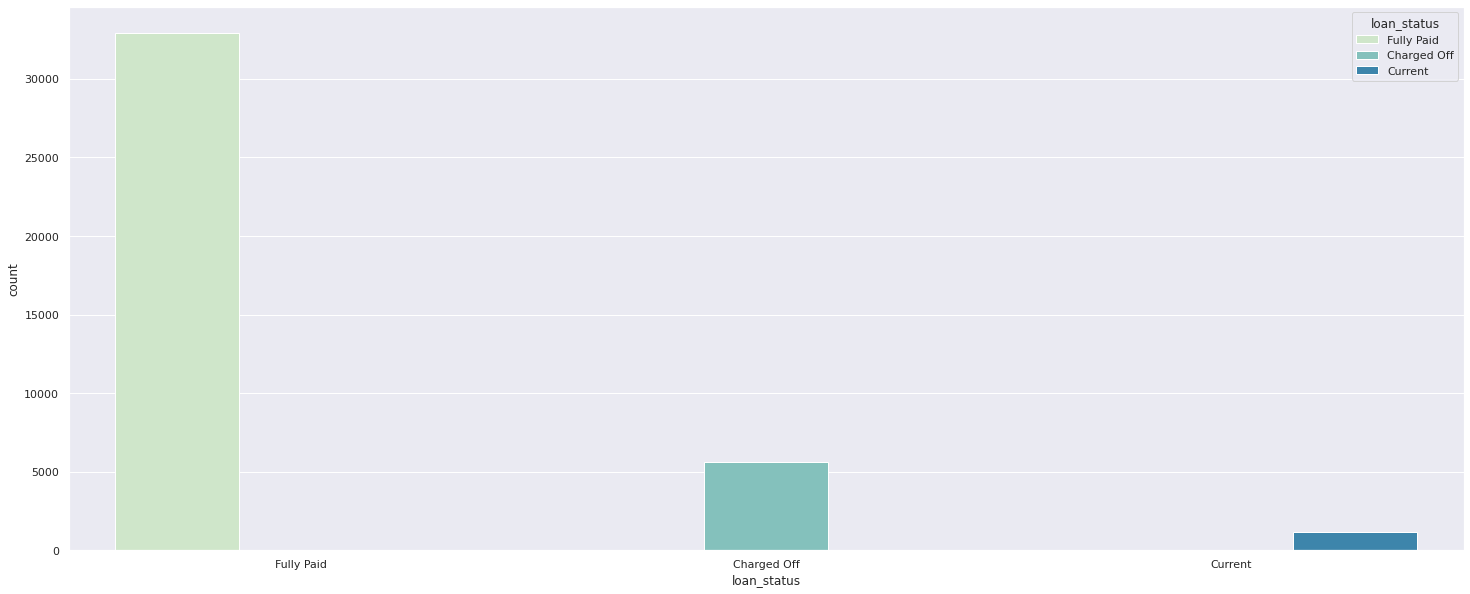

In [ ]:
plt.figure(figsize=(25,10))
chart=sns.countplot(data=df_3,
                      x='loan_status',
                      hue='loan_status',
                      palette='GnBu')

People who are taking loan for debt consolidation are more likely to get defaulted. 

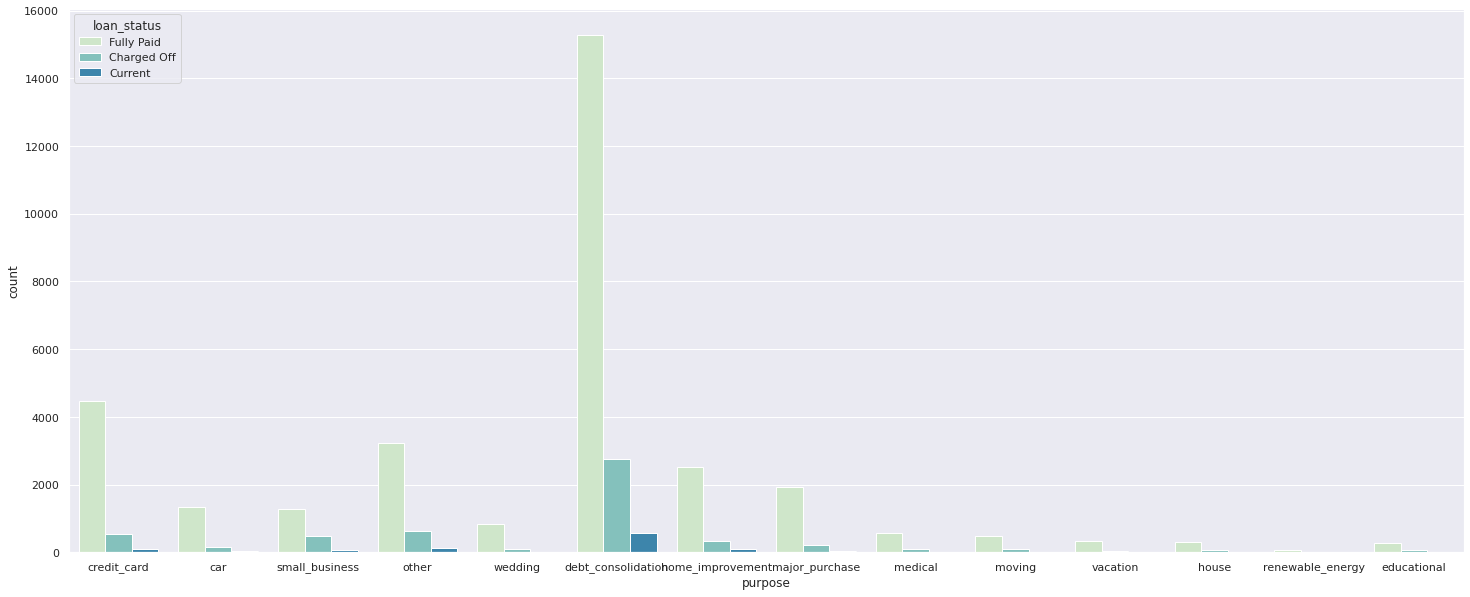

In [ ]:
plt.figure(figsize=(25,10))
chart=sns.countplot(data=df_3,
                      x='purpose',
                      hue='loan_status',
                      palette='GnBu')

People from address CA are more likely to get defaulted.

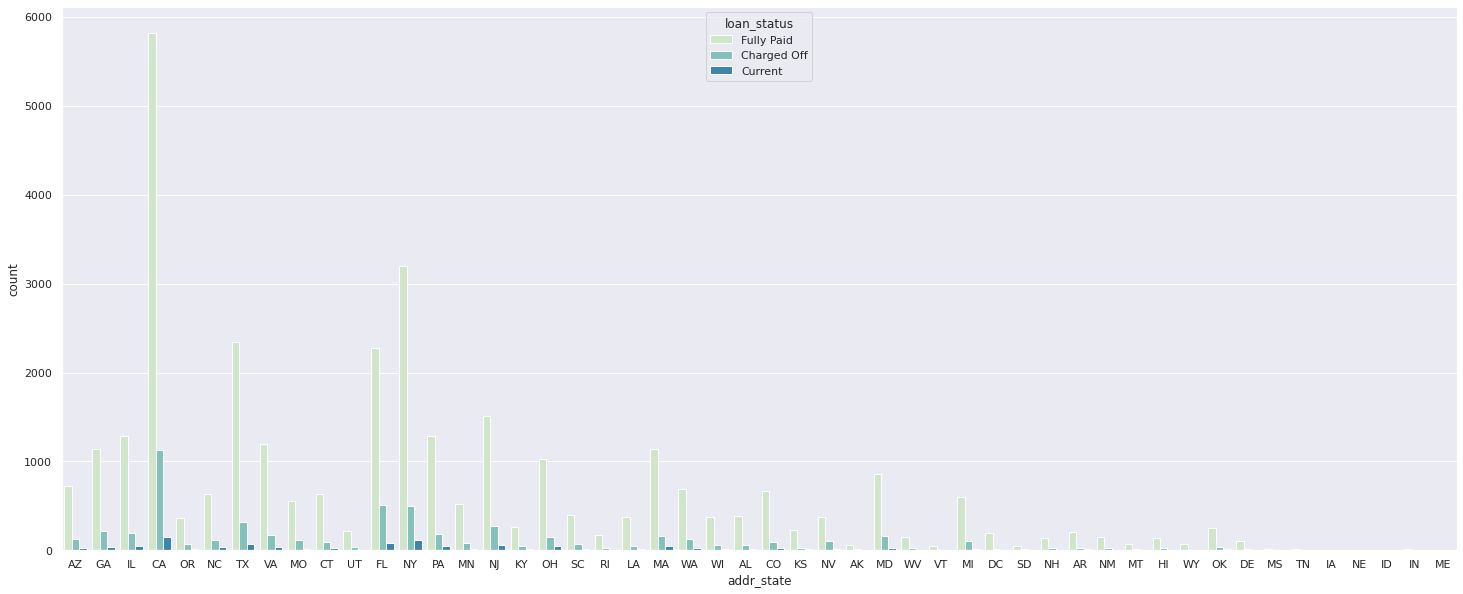

In [ ]:
plt.figure(figsize=(25,10))
chart=sns.countplot(data=df_3,
                      x='addr_state',
                      hue='loan_status',
                      palette='GnBu')

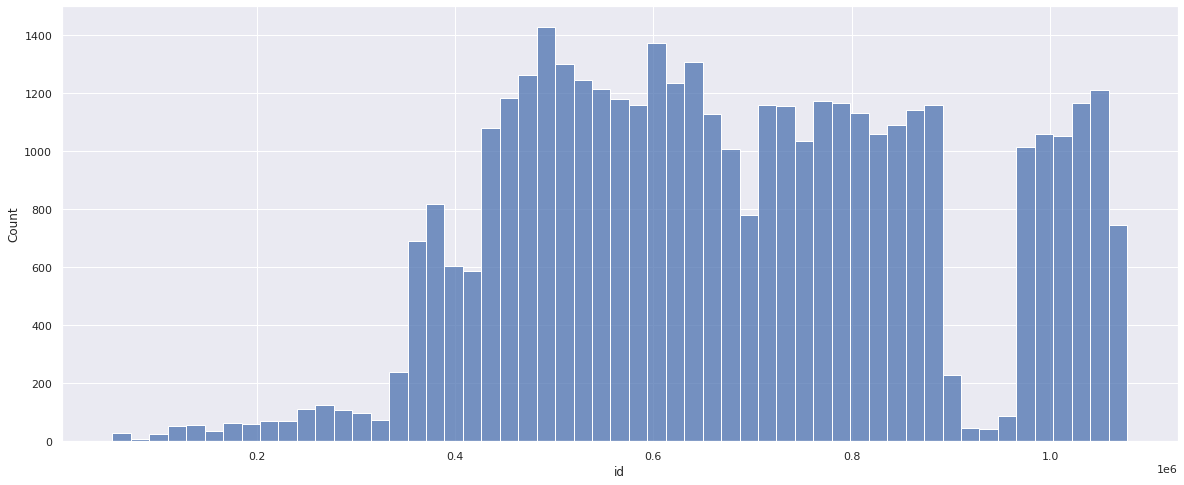

In [ ]:
plt.figure(figsize=(20,8))
chart=sns.histplot(df_3['id'])

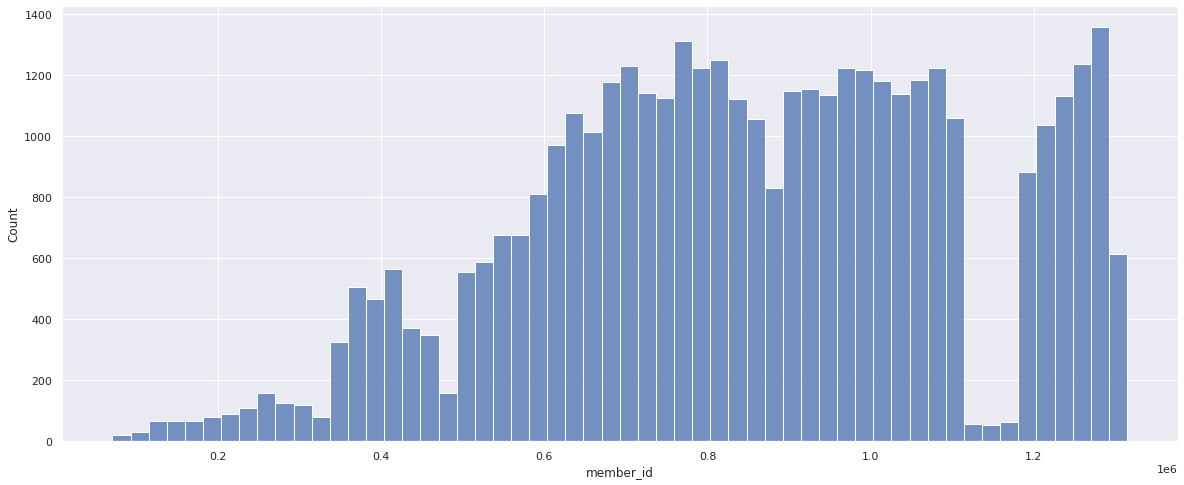

In [ ]:
plt.figure(figsize=(20,8))
chart=sns.histplot(df_3['member_id'])

Loan amount of 5000 and 10000 are most likely to be taken based on the data available. 

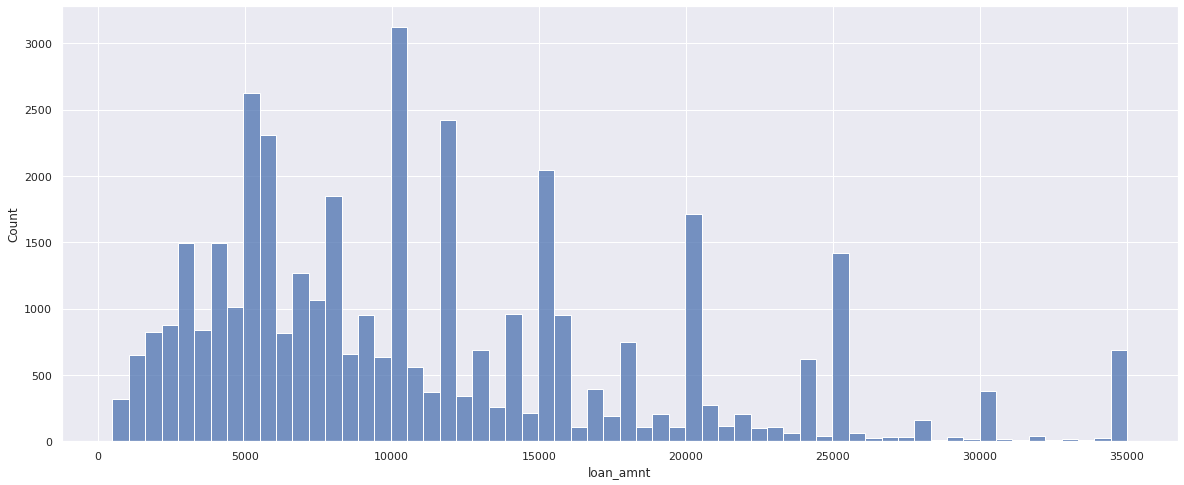

In [ ]:
plt.figure(figsize=(20,8))
chart=sns.histplot(df_3['loan_amnt'])

Funded amount ranging from 5000 to 10000 are at the higher end. 

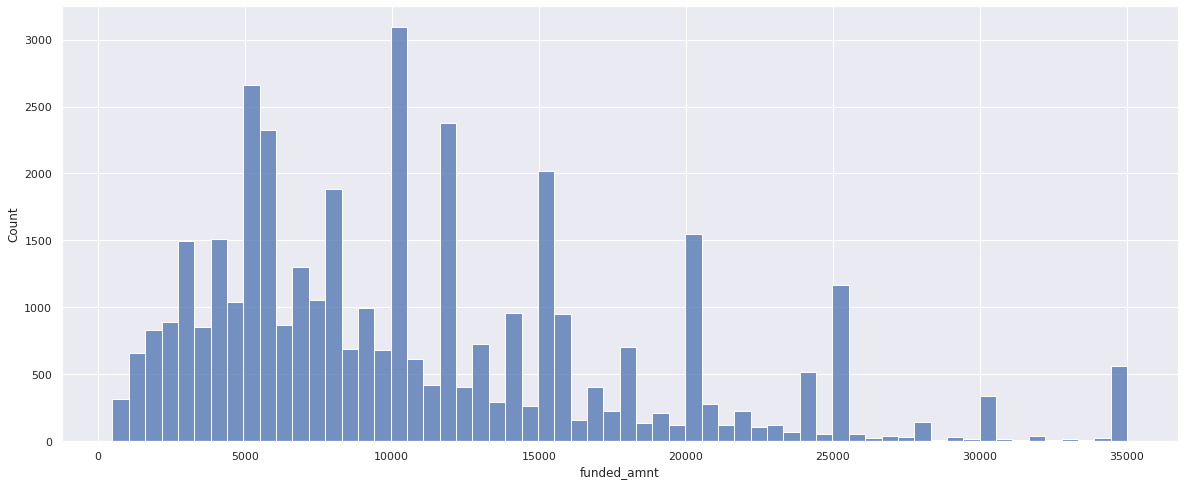

In [ ]:
plt.figure(figsize=(20,8))
chart=sns.histplot(df_3['funded_amnt'])

Funded amount from investors ranging from 5000 to 10000 are at the higher end.

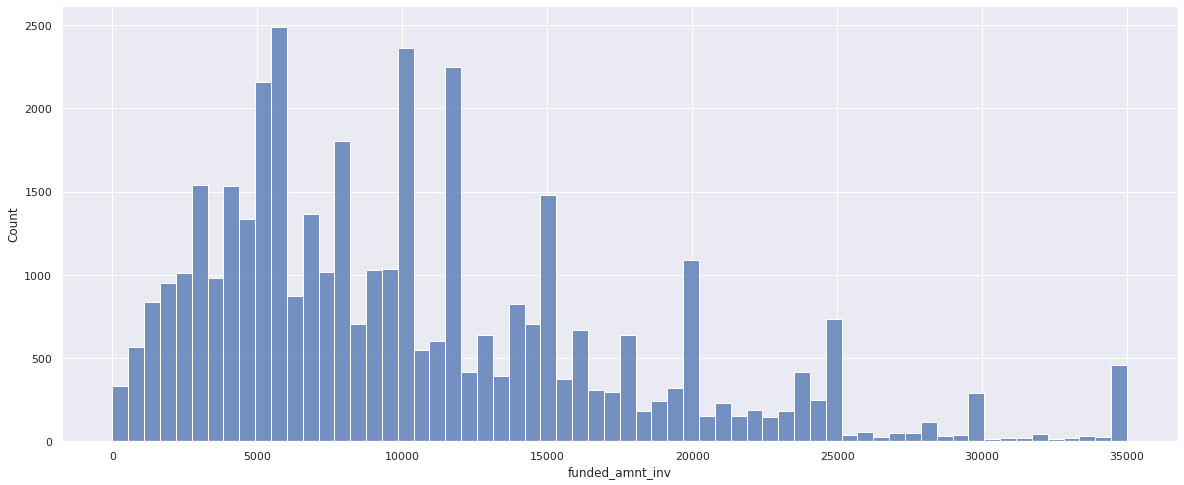

In [ ]:
plt.figure(figsize=(20,8))
chart=sns.histplot(df_3['funded_amnt_inv'])

The below graph is right skewed showing the distribution of installments.

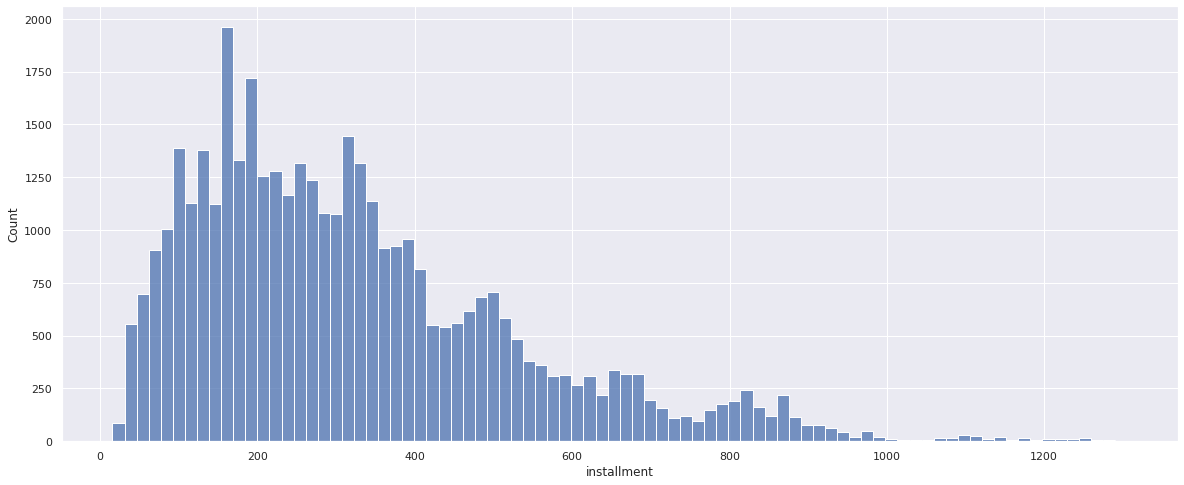

In [ ]:
plt.figure(figsize=(20,8))
chart=sns.histplot(df_3['installment'])

Employees with more than 10 years of vintage are at higher end.

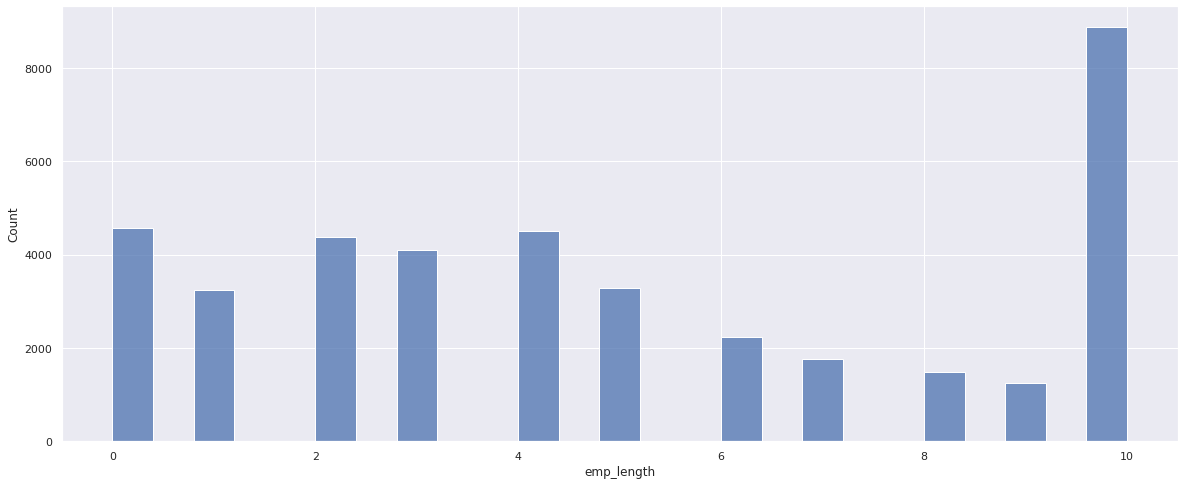

In [ ]:
plt.figure(figsize=(20,8))
chart=sns.histplot(df_3['emp_length'])

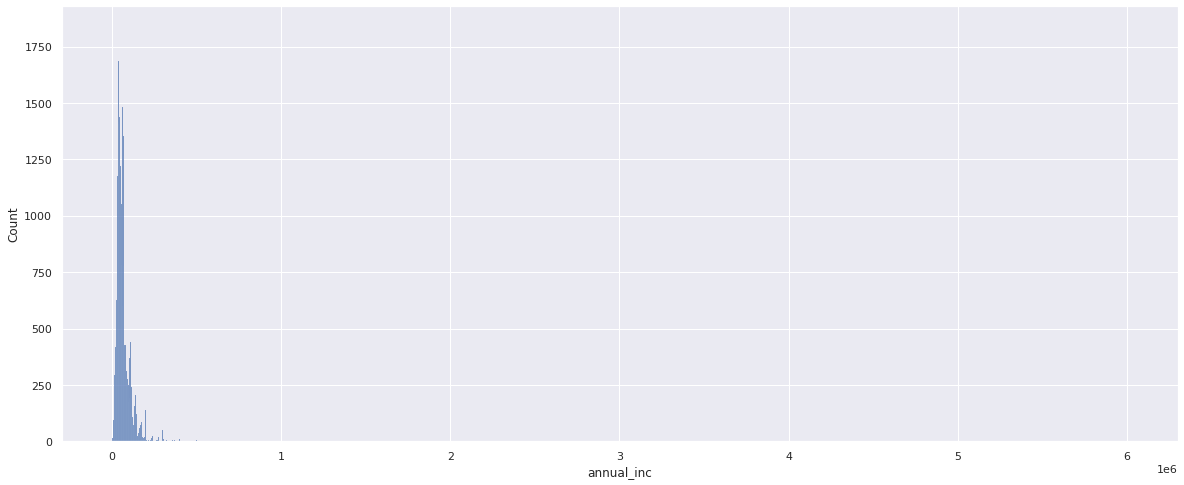

In [ ]:
plt.figure(figsize=(20,8))
chart=sns.histplot(df_3['annual_inc'])

Below graph looks symmetric as the distibution of DTI is more comparable to its mean. 

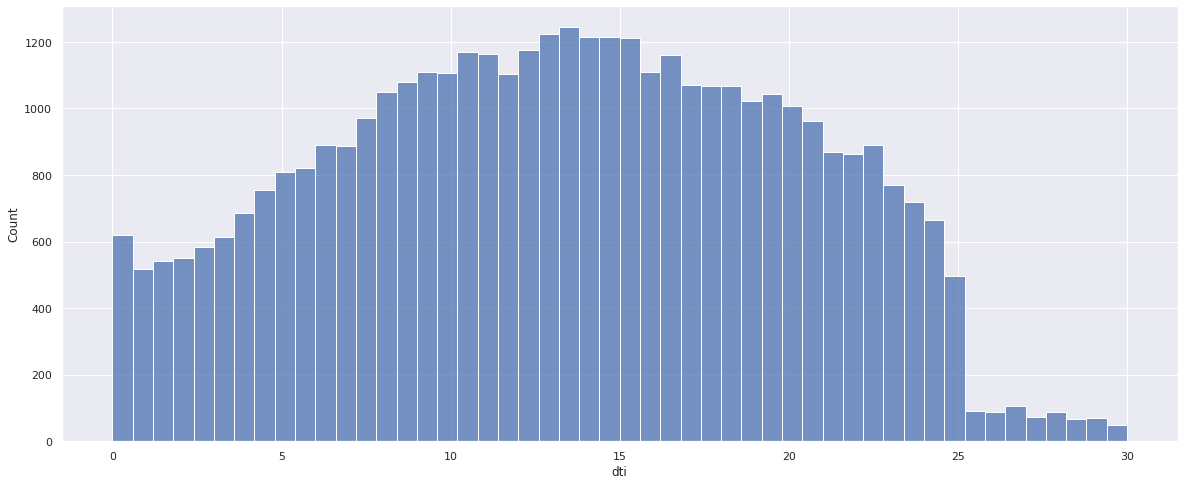

In [ ]:
plt.figure(figsize=(20,8))
chart=sns.histplot(df_3['dti'])

Below graph shows people who have gone deliquent for more than 2 years twice is very less.

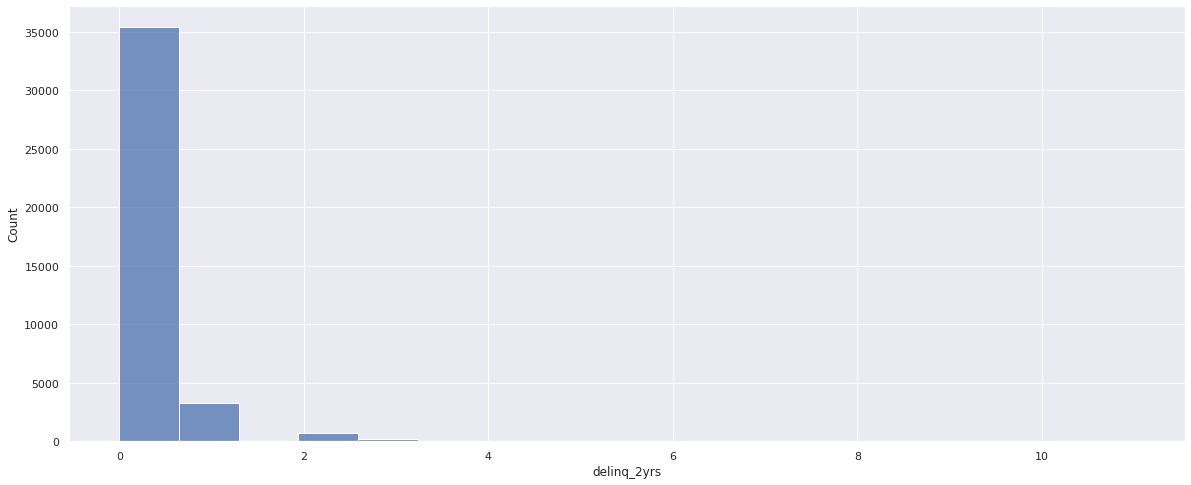

In [ ]:
plt.figure(figsize=(20,8))
chart=sns.histplot(df_3['delinq_2yrs'])

Peope who have enquired for the loans in last 6 months atleast 4 times are very less. and most people opting for loan have not enquired in last 6 months as shown in below graph.

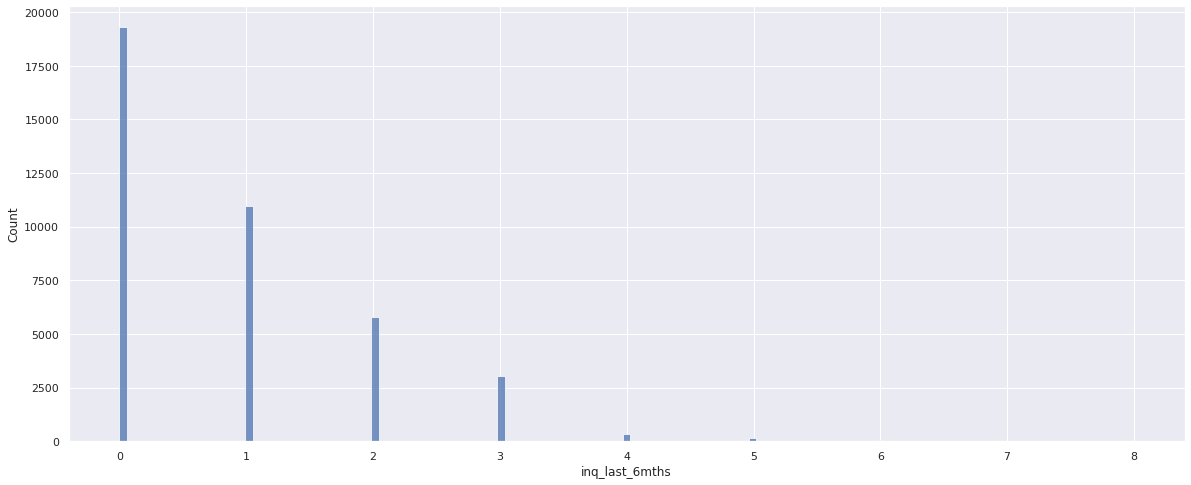

In [ ]:
plt.figure(figsize=(20,8))
chart=sns.histplot(df_3['inq_last_6mths'])

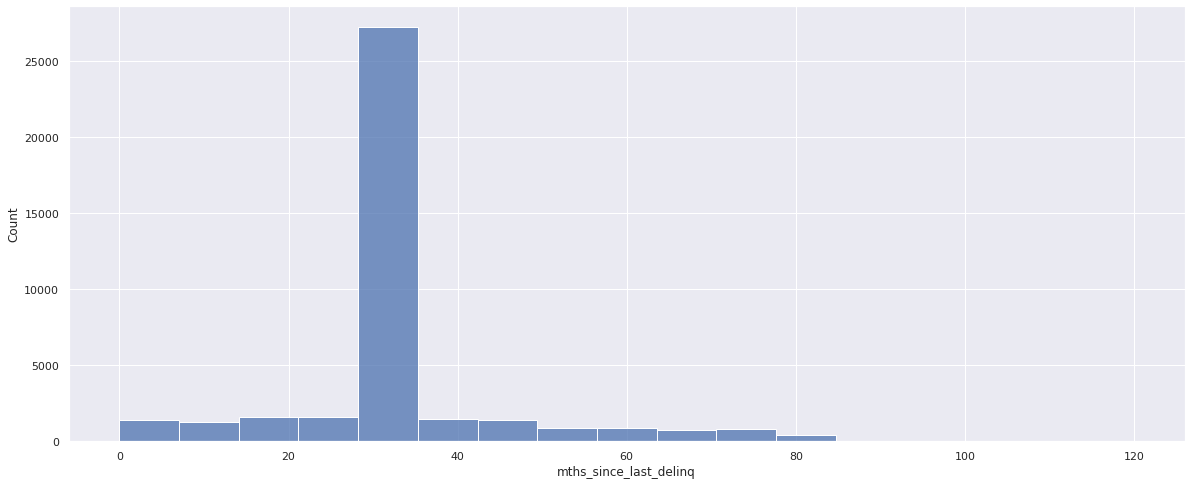

In [ ]:
plt.figure(figsize=(20,8))
chart=sns.histplot(df_3['mths_since_last_delinq'])

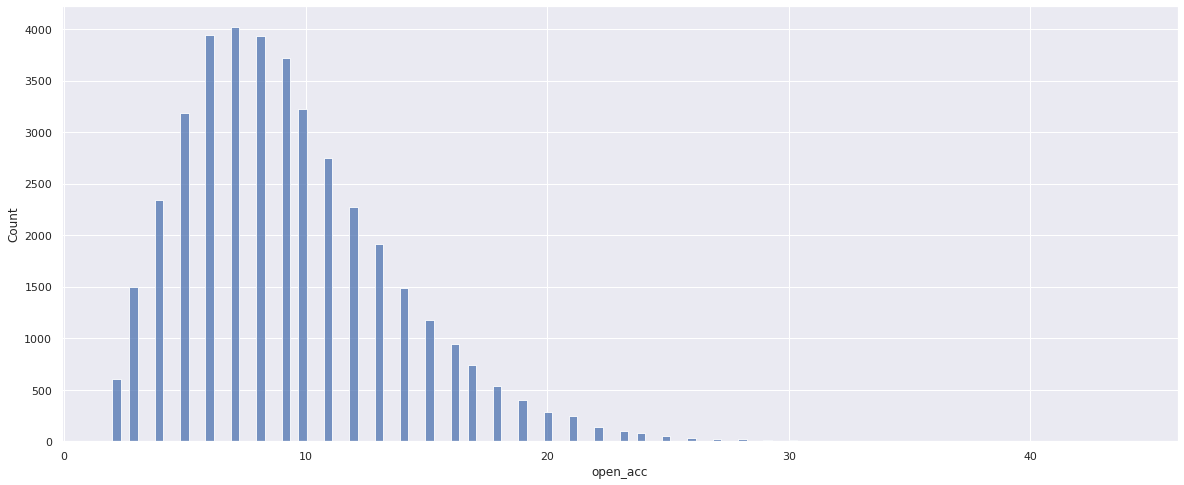

In [ ]:
plt.figure(figsize=(20,8))
chart=sns.histplot(df_3['open_acc'])

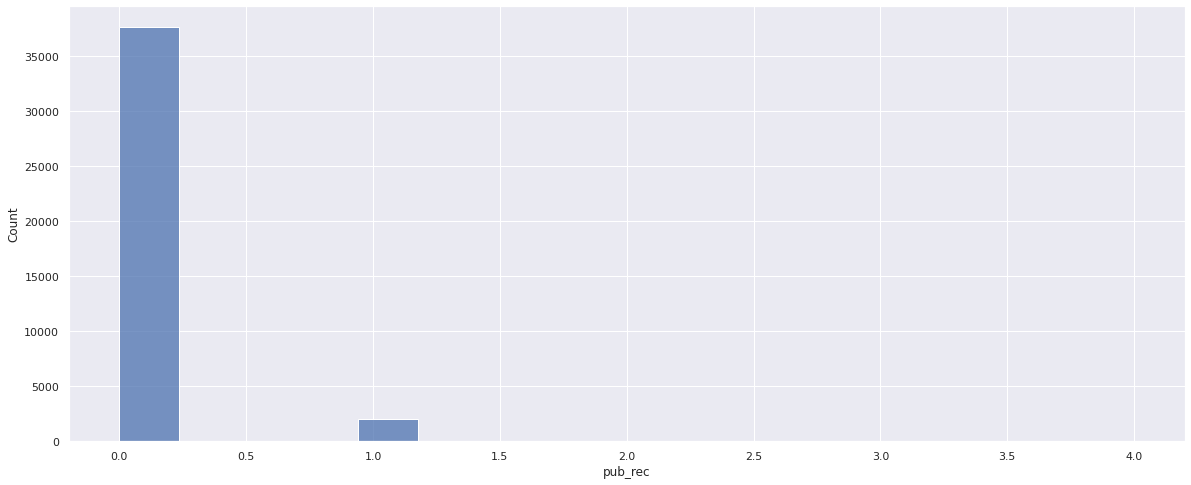

In [ ]:
plt.figure(figsize=(20,8))
chart=sns.histplot(df_3['pub_rec'])

People with revolving balance is right skewed as shown below. 

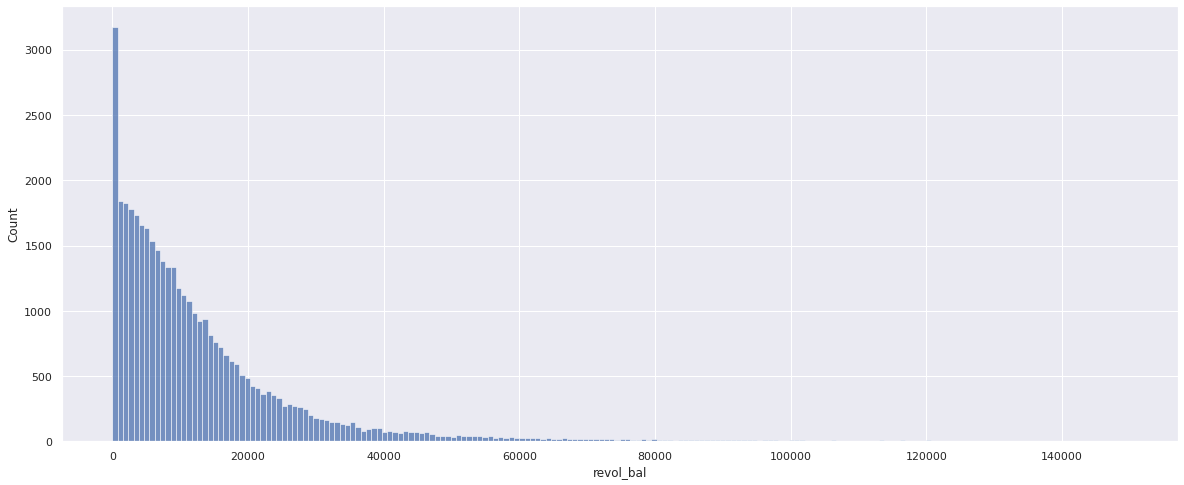

In [ ]:
plt.figure(figsize=(20,8))
chart=sns.histplot(df_3['revol_bal'])

People with total accounts is right skewed as shown below.

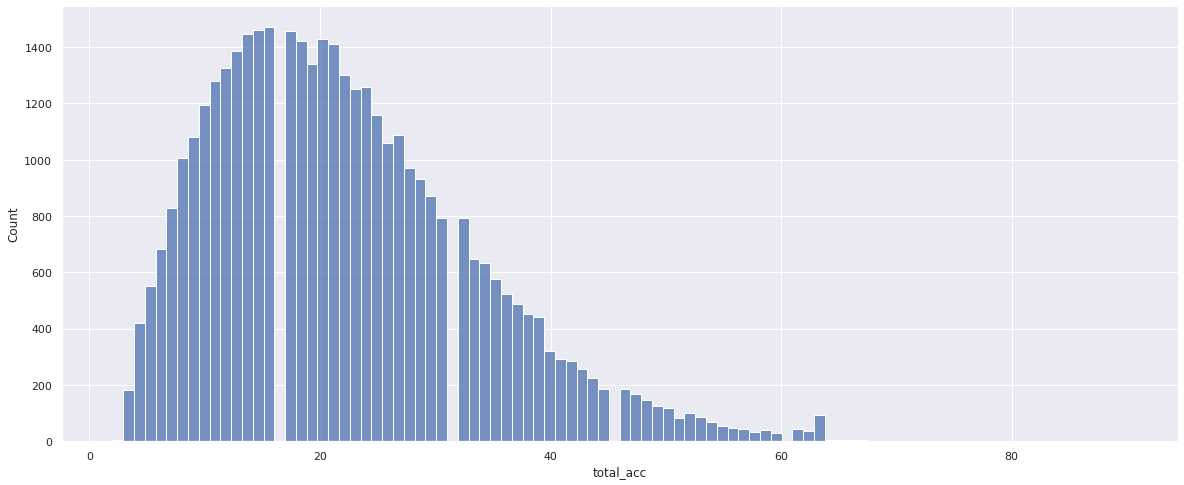

In [ ]:
plt.figure(figsize=(20,8))
chart=sns.histplot(df_3['total_acc'])

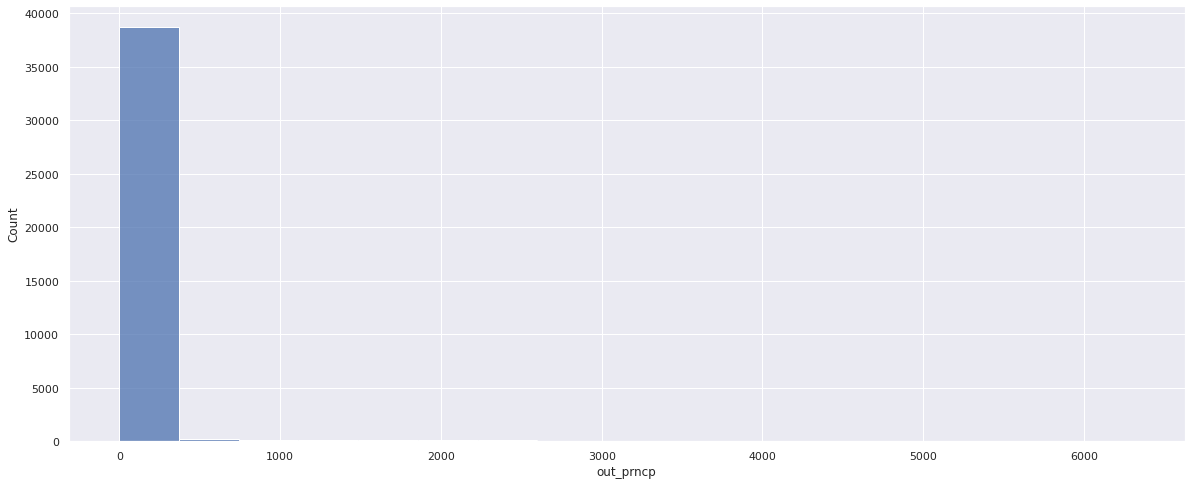

In [ ]:
plt.figure(figsize=(20,8))
chart=sns.histplot(df_3['out_prncp'])

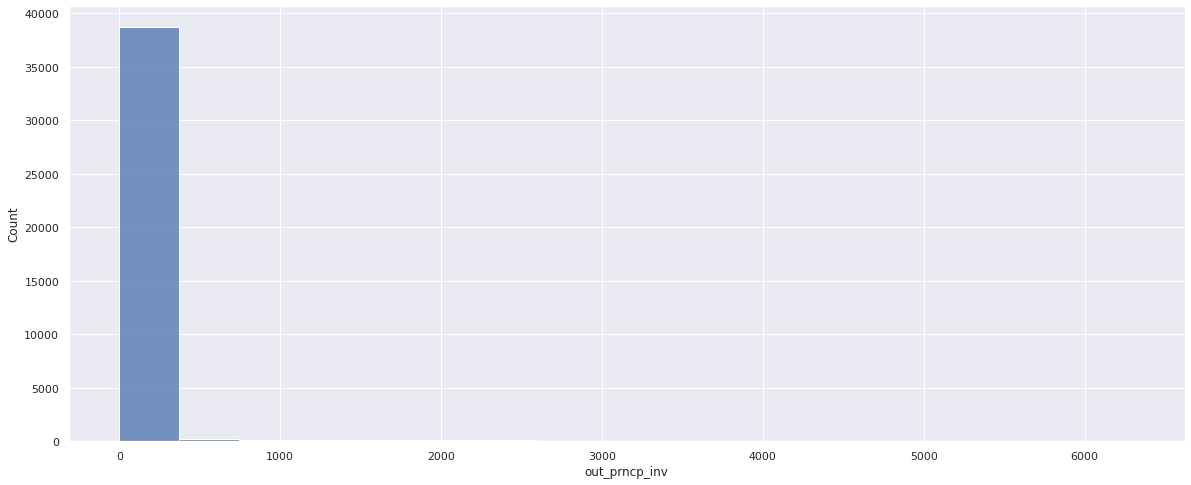

In [ ]:
plt.figure(figsize=(20,8))
chart=sns.histplot(df_3['out_prncp_inv'])

Count of Members paying total amount around  7000 to 10000

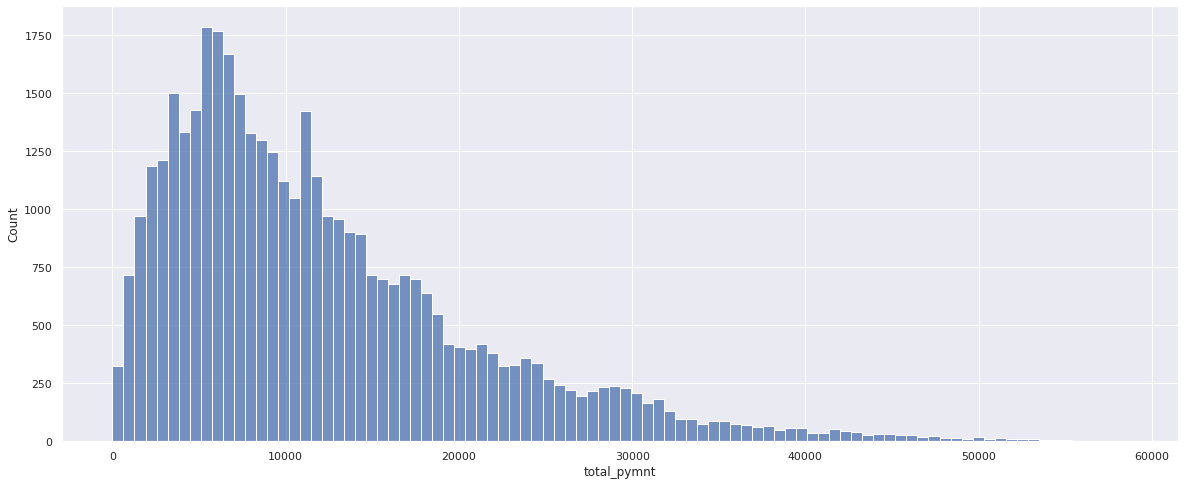

In [ ]:
plt.figure(figsize=(20,8))
chart=sns.histplot(df_3['total_pymnt'])

Count of Members paying total amount in revolving is also around  1250 to 1750

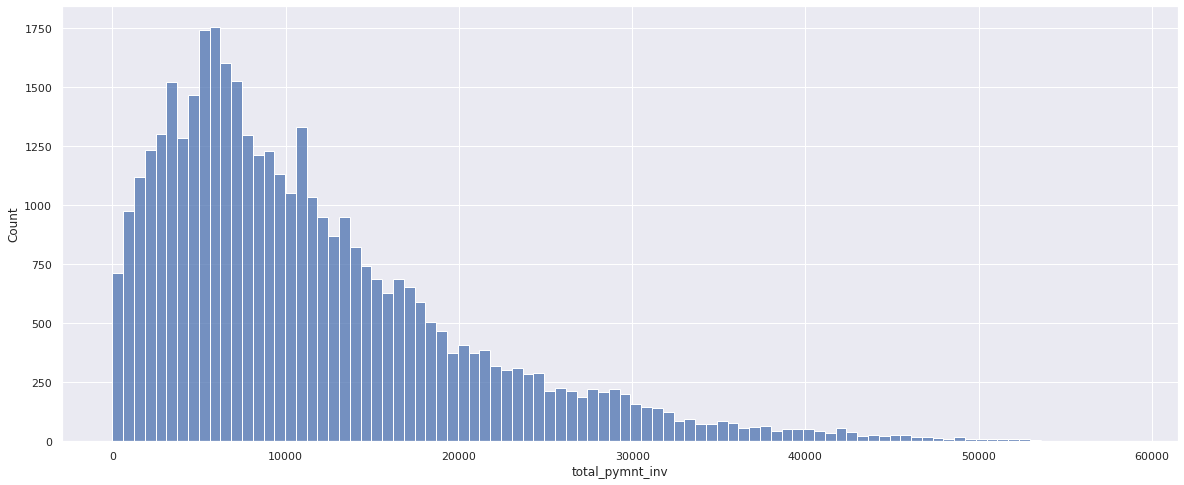

In [ ]:
plt.figure(figsize=(20,8))
chart=sns.histplot(df_3['total_pymnt_inv'])

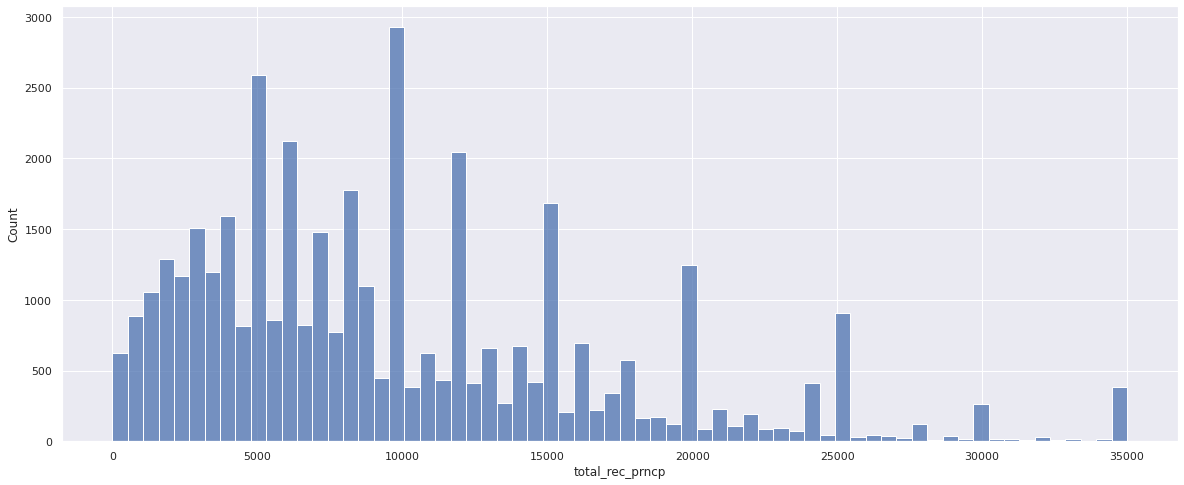

In [ ]:
plt.figure(figsize=(20,8))
chart=sns.histplot(df_3['total_rec_prncp'])

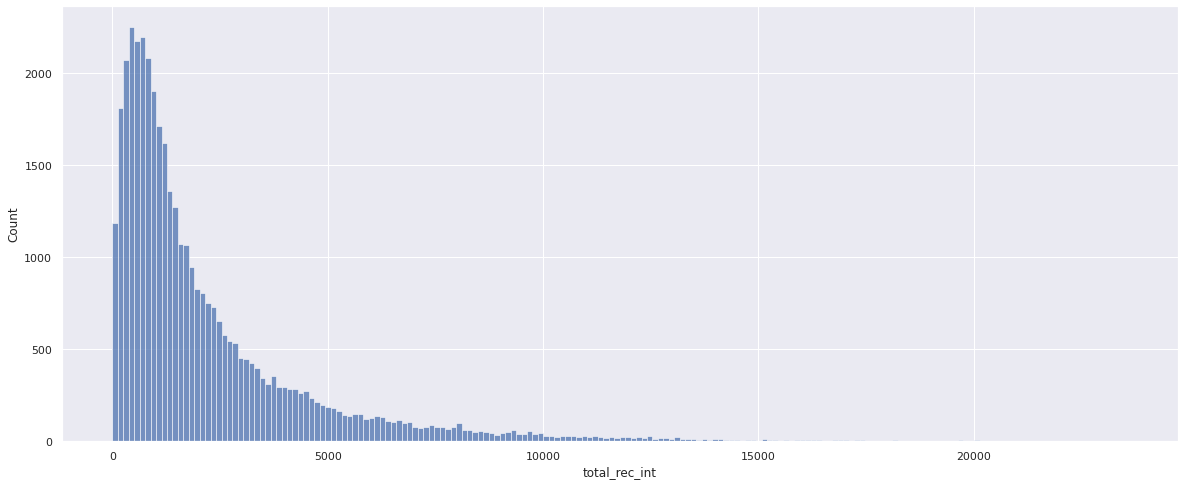

In [ ]:
plt.figure(figsize=(20,8))
chart=sns.histplot(df_3['total_rec_int'])

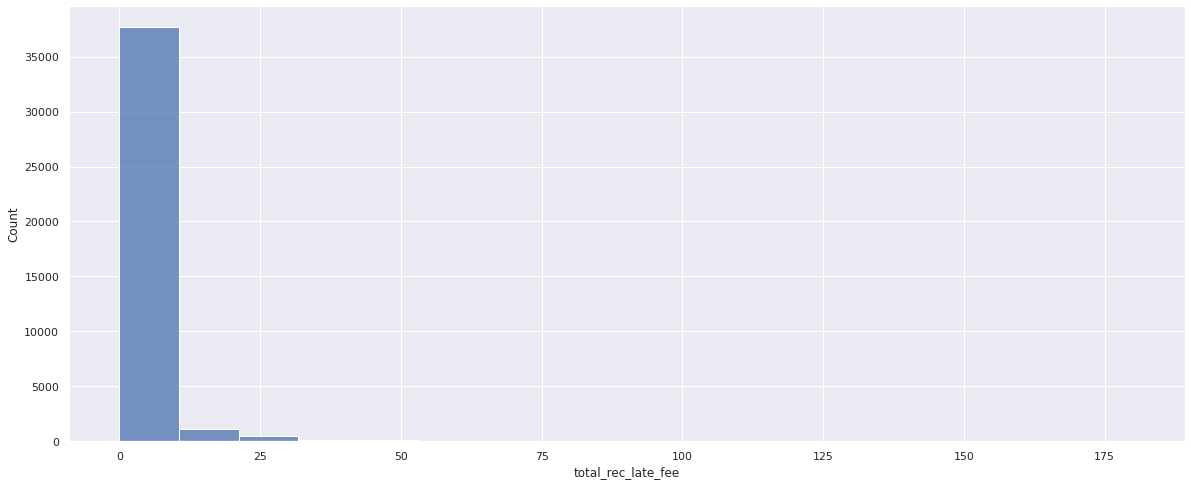

In [ ]:
plt.figure(figsize=(20,8))
chart=sns.histplot(df_3['total_rec_late_fee'])

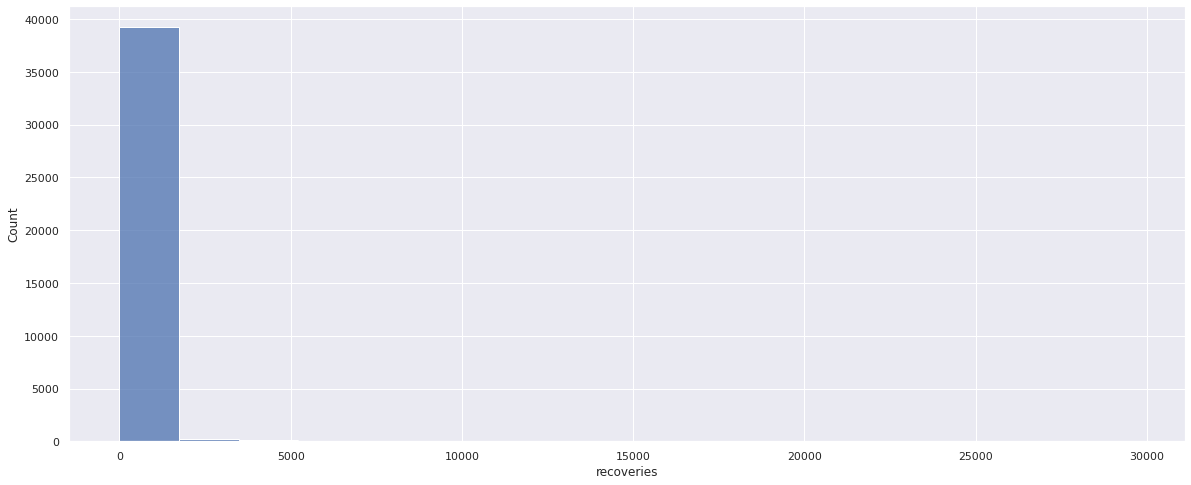

In [ ]:
plt.figure(figsize=(20,8))
chart=sns.histplot(df_3['recoveries'])

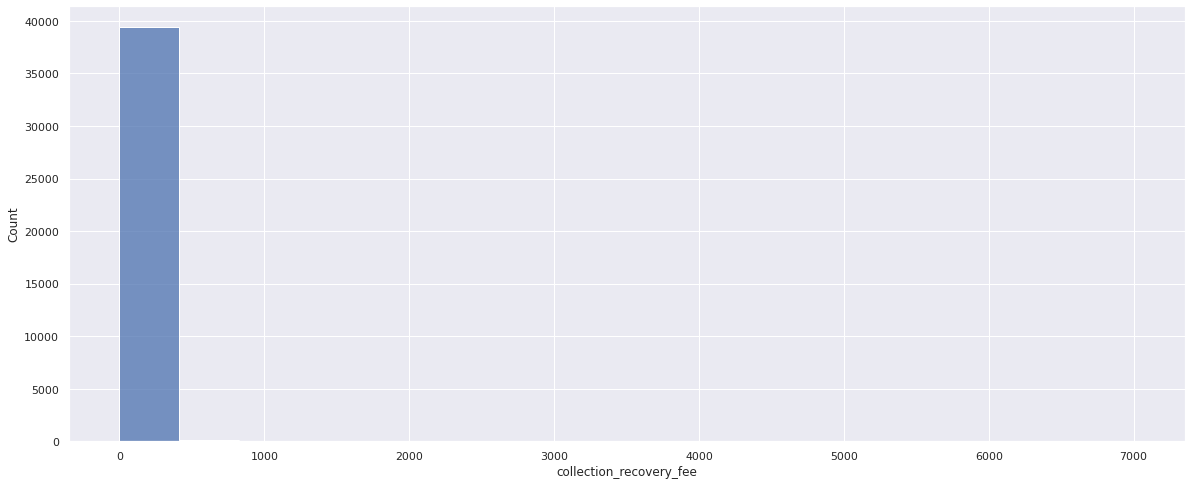

In [ ]:
plt.figure(figsize=(20,8))
chart=sns.histplot(df_3['collection_recovery_fee'])

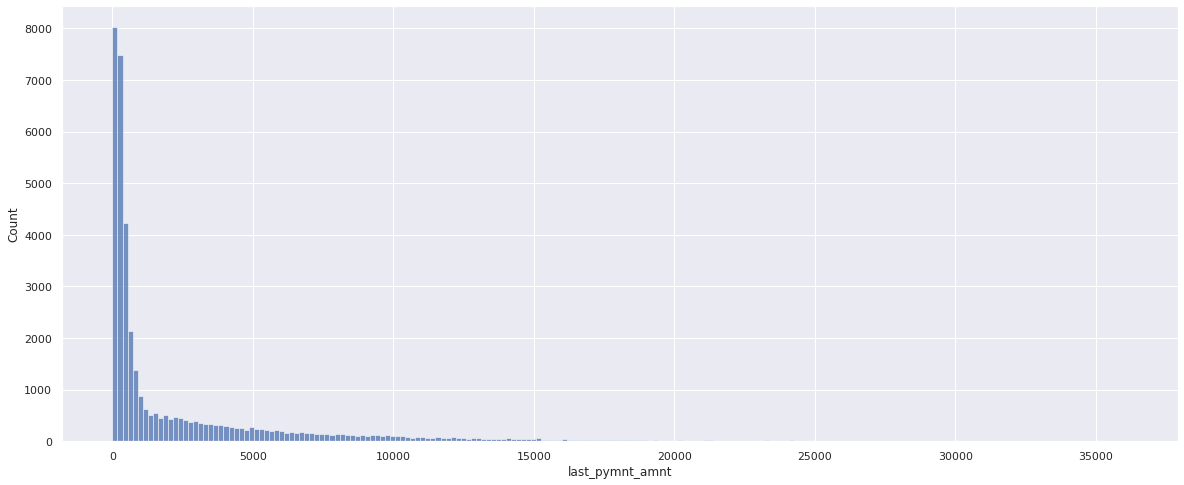

In [ ]:
plt.figure(figsize=(20,8))
chart=sns.histplot(df_3['last_pymnt_amnt'])

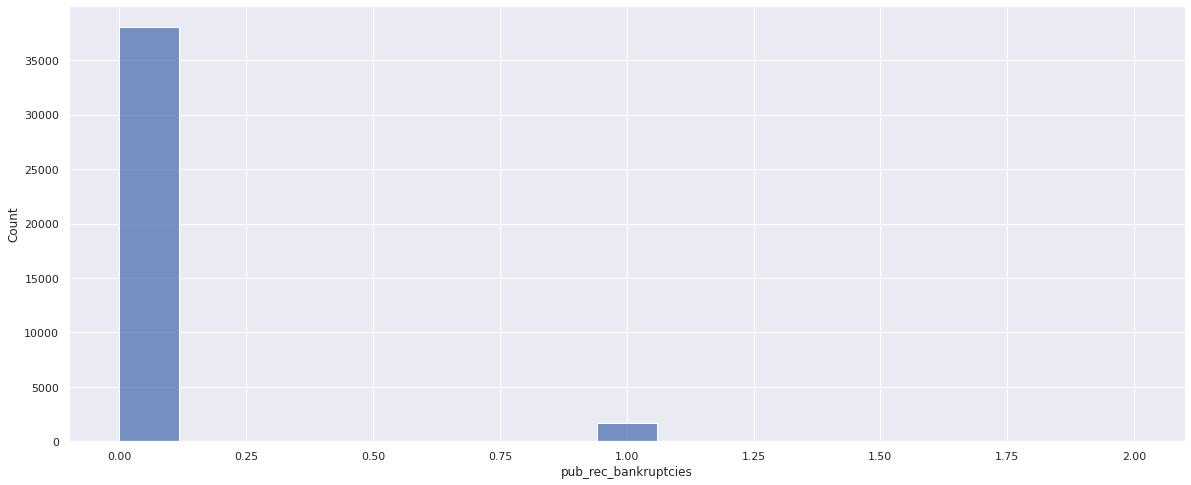

In [ ]:
plt.figure(figsize=(20,8))
chart=sns.histplot(df_3['pub_rec_bankruptcies'])

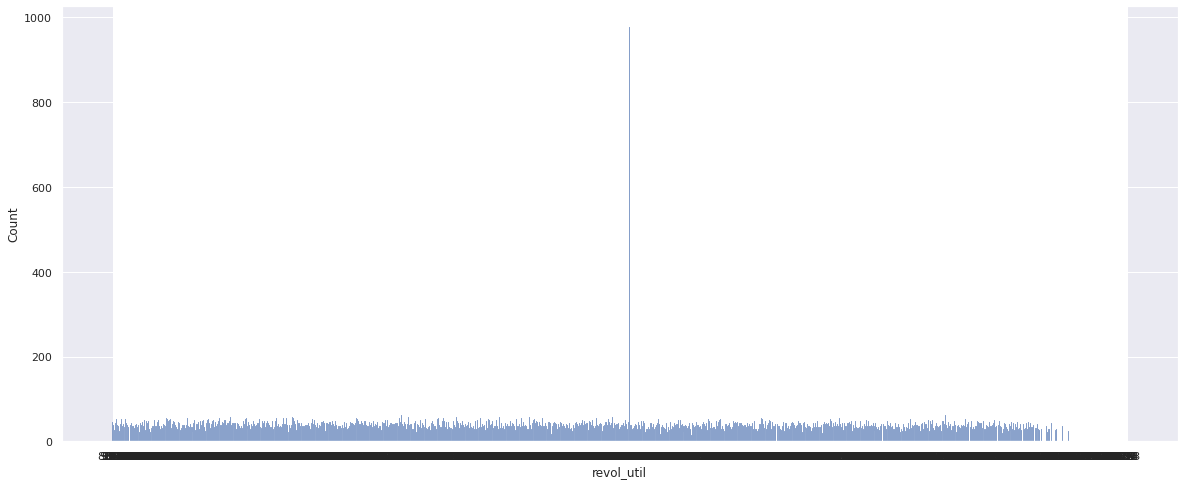

In [ ]:
plt.figure(figsize=(20,8))
chart=sns.histplot(df_3['revol_util'])

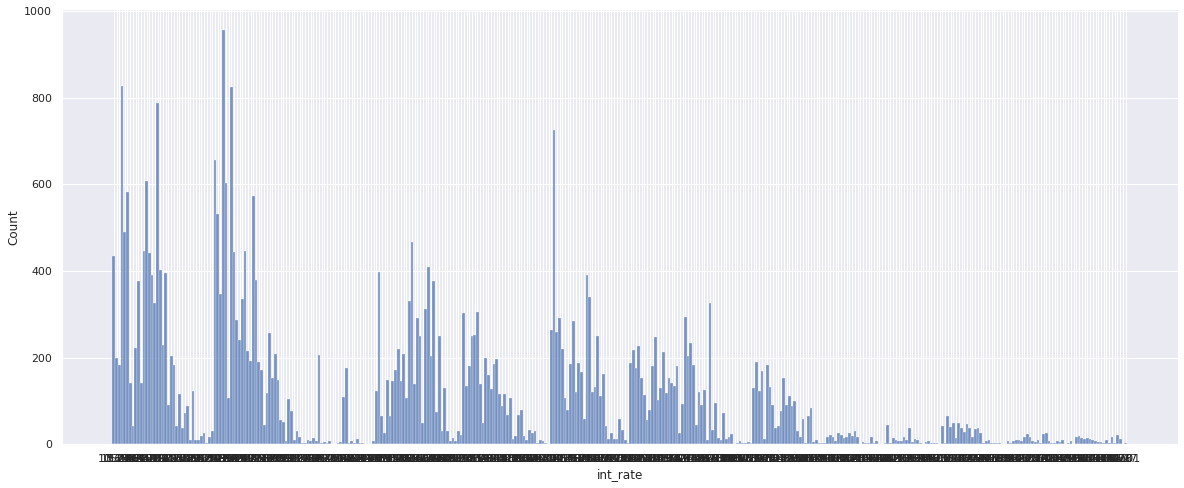

In [ ]:
plt.figure(figsize=(20,8))
chart=sns.histplot(df_3['int_rate'])